# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [ ]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [ ]:
df = pd.read_csv("craftcans.csv")

## How many rows do you have in the data? What are the column types?

In [16]:
df.shape

(2416, 7)

In [17]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [18]:
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [ ]:
df['Brewery'].value_counts().head(10)

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [19]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [35]:
# df['ABV'].str.replace("%", "")
nopercent = df['ABV'].str.replace("%", " ")
pd.to_numeric(nopercent)

ValueError: Unable to parse string "???" at position 94

In [36]:
# Convert it to a float

# Save it into a new column

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [37]:
df[df['Location'] != "UNKNOWN"]['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [43]:
df[df['Location'] == 'Brooklyn, NY']['Beer']

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


What brewery in Brooklyn puts out the most cans of beer?

In [44]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [46]:
df[df['Brewery']== 'Sixpoint Craft Ales']['Style'].value_counts().head(5)

American IPA                      4
Baltic Porter                     2
German Pilsener                   2
American Double / Imperial IPA    2
Rye Beer                          2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [55]:
# df[df['Location'].str.contains("NY")]['Location'].value_counts()
df[df['Location'].str.contains("NY", na=False)]['Brewery'].value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Butternuts Beer and Ale           4
Blue Point Brewing Company        4
KelSo Beer Company                3
The Bronx Brewery                 3
Bomb Beer Company                 2
Montauk Brewing Company           2
Upstate Brewing Company           2
Chatham Brewing                   2
Dundee Brewing Company            1
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [58]:
df['IBUs'].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

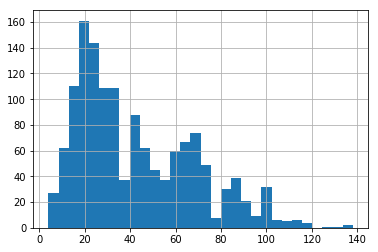

In [65]:
%matplotlib inline
df['IBUs'].hist(bins=30)

## List all of the beers with IBUs above the 75th percentile

In [73]:
df[df['IBUs'] > df['IBUs'].quantile(.75)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20%,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.70%,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.50%,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.50%,75.0


## List all of the beers with IBUs below the 25th percentile

In [72]:
df[df['IBUs'] < df['IBUs'].quantile(.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.00%,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.50%,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.00%,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.20%,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.80%,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.70%,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.60%,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.60%,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.10%,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

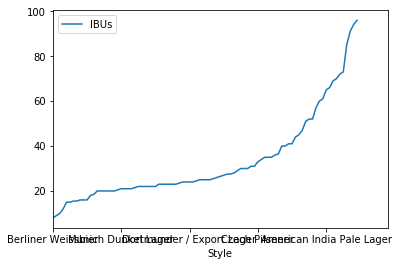

In [97]:
df.groupby('Style').median().sort_values('IBUs', ascending=True).plot() 

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [105]:
df.sort_values('IBUs',ascending=False).head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.20%,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.90%,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.00%,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.90%,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.00%,120.0


In [108]:
df.sort_values('IBUs',ascending=False)['Style'].value_counts().head(5)

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: Style, dtype: int64

In [111]:
df.sort_values('IBUs',ascending=False)['Style'].value_counts().tail(5)

American Malt Liquor    1
Smoked Beer             1
Wheat Ale               1
Low Alcohol Beer        1
Kristalweizen           1
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [127]:
# df[df'Style'=='Witbier').median().sort_values('IBUs', ascending=True).plot(
averageIBU= df[df['Style'].isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])]
averageIBU['IBUs'].mean()

18.982142857142858

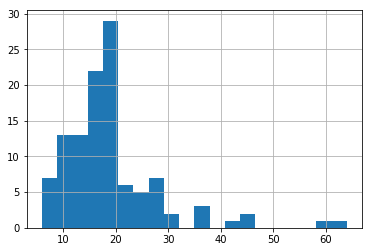

In [131]:
averageIBU['IBUs'].hist(bins=20, xlabelsize=10, ylabelsize=10)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [137]:
df[df['Style'].str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.50%,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.30%,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.70%,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.70%,NaN


In [138]:
IPA=df[df['Style'].str.contains("IPA", na=False)]
IPA.mean()

IBUs    71.94898
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109b5cd68>]], dtype=object)

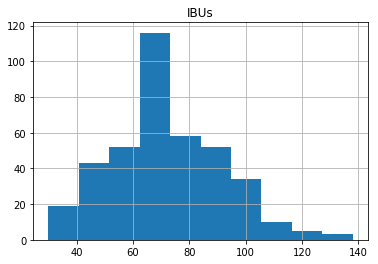

In [139]:
IPA.hist()

## Plot those two histograms on top of one another

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109ee2198>]], dtype=object)

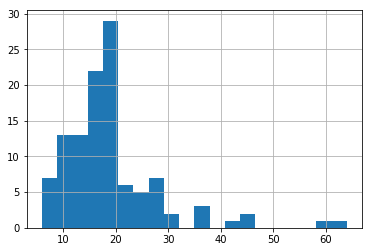

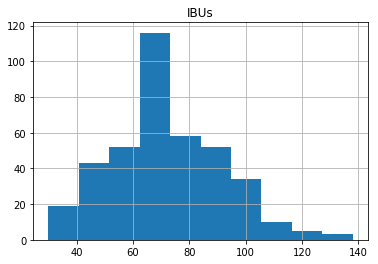

In [141]:
averageIBU['IBUs'].hist(bins=20, xlabelsize=10, ylabelsize=10)
IPA.hist()

## Compare the ABV of wheat beers vs. IPAs 

In [146]:
df[df['Style'].str.contains("Wheat", na=False)].mean()

IBUs    21.253731
dtype: float64

In [147]:
df[df['Style'].str.contains("IPA", na=False)].mean()

IBUs    71.94898
dtype: float64